# Import

In [3]:
import numpy as np
from sklearn.cluster import KMeans
import imageio
import matplotlib.pyplot as plt
import skimage.transform
import math
import os
#from module import preparing_paintings
from module.preparing_paintings import load_paintings

In [10]:
def load_paintings(artist):

    path = 'samples/' + artist
    files = os.listdir(path)

    image_list = []
    flatten_list = []

    for i in range(len(files)):

        file = path + '/' + files[i]
        image = np.array(imageio.imread(file))

        width = math.floor(image.shape[0] * 0.25)
        height = math.floor(image.shape[1] * 0.25)
        new_size = (width, height)

        resized_image = skimage.transform.resize(image, new_size, order = 3)

        image_list.append(resized_image)

        flatten = resized_image.reshape((width * height) ,-1)
        flatten_list.append(flatten)

    return image_list, flatten_list




In [24]:
def cluster_paintings(artist, bits = 32):
    image_list, flatten_list = load_paintings(artist)
    
    kmeans = KMeans(n_clusters=bits, random_state=21)

    centroids_list = []
    
    print('Clutering started. {} pictures in total.'.format(len(flatten_images)))
    for i in range(len(flatten_images)):
        kmeans.fit(flatten_images[i])
        centroids = kmeans.cluster_centers_

        centroids_list.append(centroids)
        
        print('Clustering... {}/{}'.format(i,len(flatten_images)))
    
    np.save('samples/{}/{}_centroids.npy'.format(artist,artist) ,centroids_list)
    print('Clustering done!')
    
    return image_list, centroids_list


In [13]:
image_list, flatten_list = load_paintings('Monet')
    
centroids_list = cluster_paintings(flatten_list, bits=32)

## read local file for centroids

In [36]:
def transform_my_pic(artist, target_pic, output_width, method = 'closest'):
    
    try:
        centroids_list = np.load('samples/{}/{}_centroids.npy'.format(artist,artist))
    except:
        print("No clusters found for '{}'. Please do clustering_paintings first!".format(artist))
    
    #start to read in the pic to be transformed
    target = np.array(imageio.imread(target_pic))
    
    ratio = target.shape[1] / target.shape[0]
    output_height = math.floor(output_width * ratio)

    resized_target = skimage.transform.resize(target, (output_width, output_height), order=3)
    target_flatten = resized_target.reshape((output_width * output_height), -1)

    # distance_to_samples stores the sum of distance between each pixel in target pic and the closeset centroids in each sample paintings, shape = [1, number of sample paintings]
    distance_to_samples = []

    # target_mapped stores the index of centroid that each pixel will be assigned to for all sample paintings, shape = [# paintings, target_width, target_height]
    target_mapped = np.zeros((len(centroids_list), output_width * output_height))

    for s in range(len(centroids_list)):
        distance_to_samples.append(0)
        
        print("Comparing your picture with {}'s paintings... {}/{}".format(artist, s, len(centroids_list)))
        
        for i in range(len(target_flatten)):
            distance = np.sqrt(np.sum(np.power(target_flatten[i] - centroids_list[s], 2), axis=1))

            target_mapped[s, i] = np.argmin(distance)

            min_distance = np.min(distance)
            distance_to_samples[s] += min_distance

    closest_sample = np.argmin(distance_to_samples)
    farthest_sample = np.argmax(distance_to_samples)
    
    assert method in ['closest', 'farthest'], "Please choose one of the methods: 'closest' or 'farthest'"
    
    if method == 'closest':
        target_transformed = centroids_list[closest_sample][target_mapped[closest_sample].astype('int')] #only int can be used as index to transform back in to centroids
        plt.imshow(image_list[closest_sample])
        plt.show()
    elif method == 'farthest':
        target_transformed = centroids_list[farthest_sample][target_mapped[farthest_sample].astype('int')]
        plt.imshow(image_list[farthest_sample])
        plt.show()
    
    target_transformed = target_transformed.reshape(output_width, output_height, -1)
    
    plt.imshow(resized_target)
    plt.show()
    plt.imshow(target_transformed)
    plt.show()

Comparing your picture with Monet's paintings... 0/10
Comparing your picture with Monet's paintings... 1/10
Comparing your picture with Monet's paintings... 2/10
Comparing your picture with Monet's paintings... 3/10
Comparing your picture with Monet's paintings... 4/10
Comparing your picture with Monet's paintings... 5/10
Comparing your picture with Monet's paintings... 6/10
Comparing your picture with Monet's paintings... 7/10
Comparing your picture with Monet's paintings... 8/10
Comparing your picture with Monet's paintings... 9/10


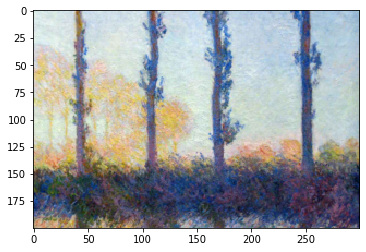

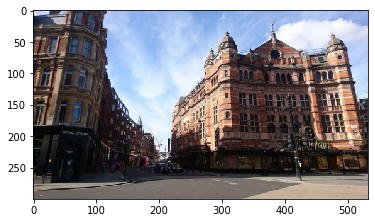

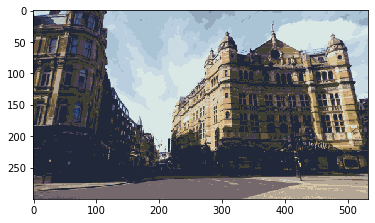

In [37]:
file = 'test/test3.jpg'
transform_my_pic('Monet', file, 300, method = 'closest')

In [43]:
def transform_color(artist, bits, target_pic, output_width, method = 'closest'):
    
    image_list, flatten_list = load_paintings(artist)
    
    centroids_list = cluster_paintings(flatten_list, bits)
    
    #start to read in the pic to be transformed
    target = np.array(imageio.imread(target_pic))
    
    ratio = target.shape[1] / target.shape[0]
    output_height = math.floor(output_width * ratio)

    resized_target = skimage.transform.resize(target, (output_width, output_height), order=3)
    target_flatten = resized_target.reshape((output_width * output_height), -1)

    # distance_to_samples stores the sum of distance between each pixel in target pic and the closeset centroids in each sample paintings, shape = [1, number of sample paintings]
    distance_to_samples = []

    # target_mapped stores the index of centroid that each pixel will be assigned to for all sample paintings, shape = [# paintings, target_width, target_height]
    target_mapped = np.zeros((len(centroids_list), output_width * output_height))

    for s in range(len(centroids_list)):
        distance_to_samples.append(0)
        for i in range(len(target_flatten)):
            distance = np.sqrt(np.sum(np.power(target_flatten[i] - centroids_list[s], 2), axis=1))

            target_mapped[s, i] = np.argmin(distance)

            min_distance = np.min(distance)
            distance_to_samples[s] += min_distance

    closest_sample = np.argmin(distance_to_samples)
    farthest_sample = np.argmax(distance_to_samples)
    
    assert method in ['closest', 'farthest'], "please choose one, 'closest' or 'farthest'"
    
    if method == 'closest':
        target_transformed = centroids_list[closest_sample][target_mapped[closest_sample].astype('int')] #only int can be used as index to transform back in to centroids
        plt.imshow(image_list[closest_sample])
        plt.show()
    elif method == 'farthest':
        target_transformed = centroids_list[farthest_sample][target_mapped[farthest_sample].astype('int')]
        plt.imshow(image_list[farthest_sample])
        plt.show()
    
    target_transformed = target_transformed.reshape(output_width, output_height, -1)
    
    plt.imshow(resized_target)
    plt.show()
    plt.imshow(target_transformed)
    plt.show()

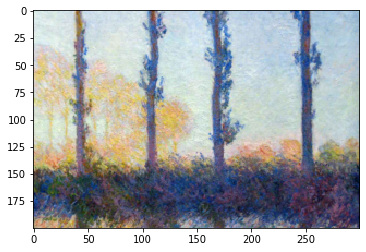

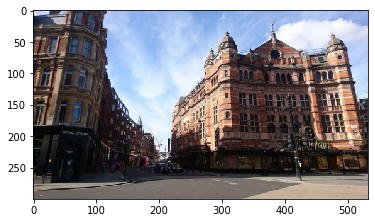

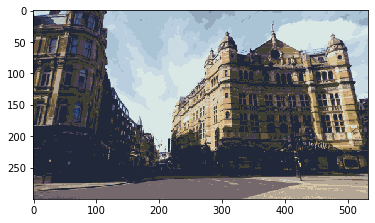

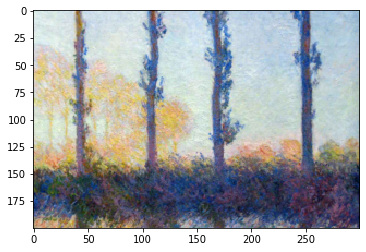

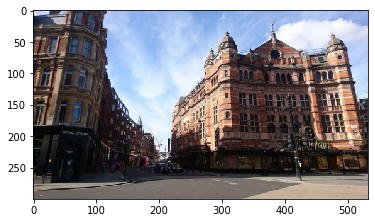

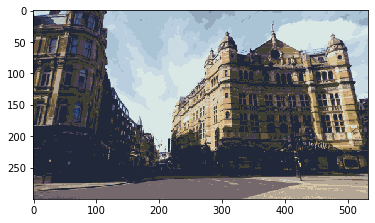

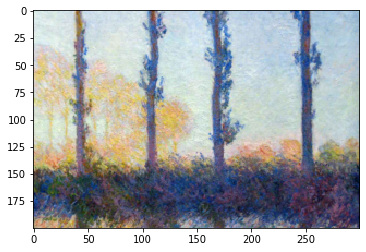

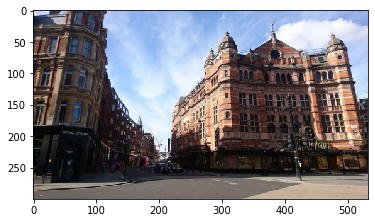

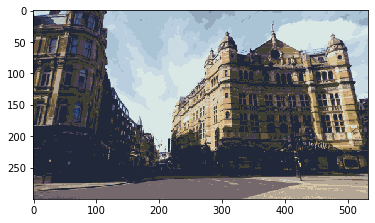

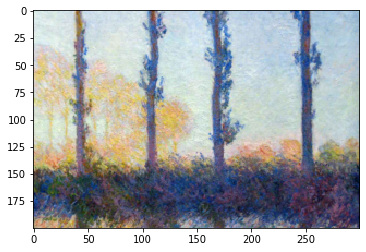

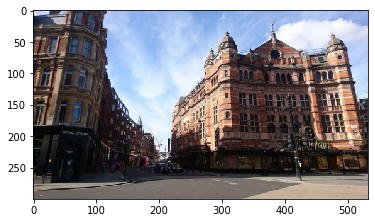

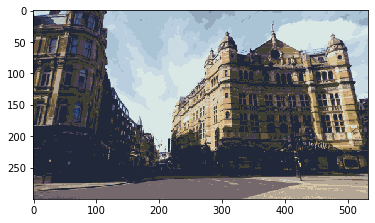

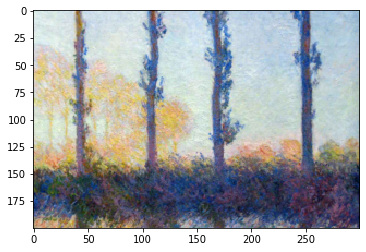

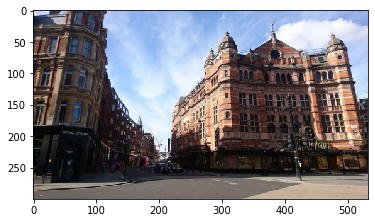

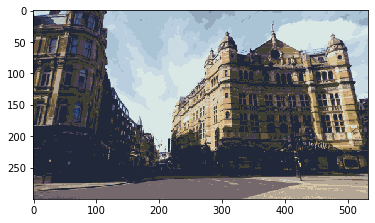

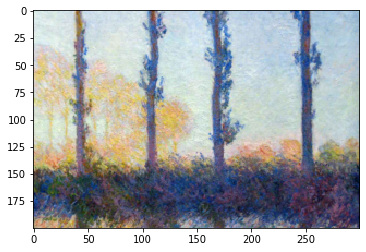

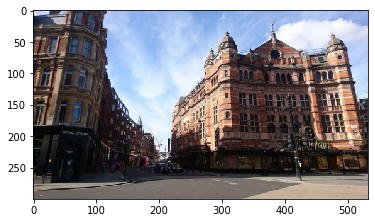

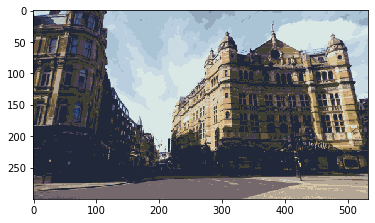

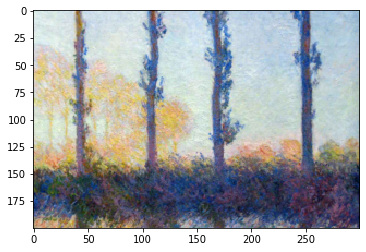

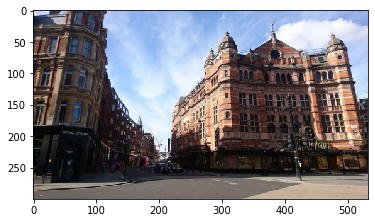

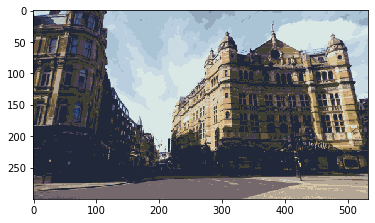

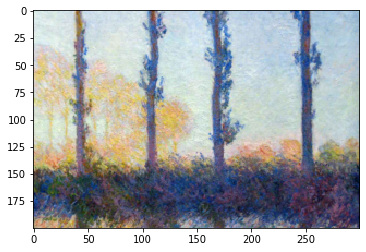

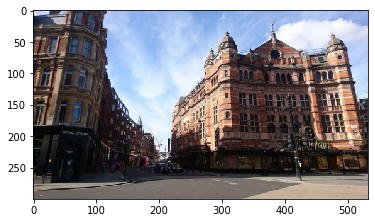

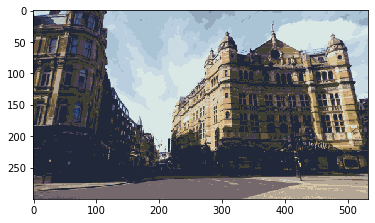

3min 25s ± 3.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
file = 'test/test3.jpg'
transform_color('Monet', 32, file, 300, method = 'closest')

# Read samples based on selected artist

After an artist being selected, the artist's paintings are resized to 25% and transformed to array. Results are stored in image_list and flatten_list.

In [4]:
artist = 'Monet'
path = 'samples/' + artist
files = os.listdir(path)

image_list = []
flatten_list = []

for i in range(len(files)):

    file = path + '/' + files[i]
    
    image = np.array(imageio.imread(file))
    
    width = math.floor(image.shape[0] * 0.25)
    height = math.floor(image.shape[1] * 0.25)
    
    new_size = (width, height)
    
    resized_image = skimage.transform.resize(image, new_size, order = 3)
    
    image_list.append(resized_image)
    
    
    flatten = resized_image.reshape((width*height),-1)
    flatten_list.append(flatten)
    
    


Change the index to see different paintings.

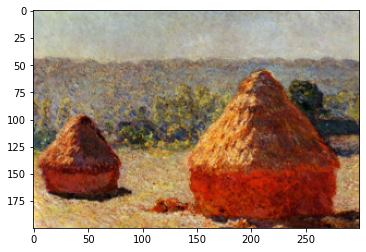

In [6]:
#See specific sample
plt.imshow(image_list[2])

# Get centroids for each sample

In [7]:
kmeans = KMeans(n_clusters=32, random_state=21)

centroids_list = []

for i in range(len(flatten_list)):
    kmeans.fit(flatten_list[i])
    centroids = kmeans.cluster_centers_
    
    centroids_list.append(centroids)

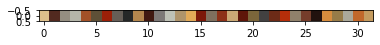

In [8]:
plt.imshow(centroids_list[2].reshape(1,32,3))

# Target picture

In [11]:
file = 'test/test3.jpg'
target = np.array(imageio.imread(file))
target_width = math.floor(target.shape[0] * 0.25)
target_height = math.floor(target.shape[1] * 0.25)

resized_target = skimage.transform.resize(target, (target_width, target_height), order=3)
target_flatten = resized_target.reshape((target_width * target_height), -1)

# distance_to_samples stores the sum of distance between each pixel in target pic and the closeset centroids in each sample paintings, shape = [1, number of sample paintings]
distance_to_samples = []

# target_mapped stores the index of centroid that each pixel will be assigned to for all sample paintings, shape = [# paintings, target_width, target_height]
target_mapped = np.zeros((len(centroids_list), target_width * target_height))

for s in range(len(centroids_list)):
    distance_to_samples.append(0)
    for i in range(len(target_flatten)):
        distance = np.sqrt(np.sum(np.power(target_flatten[i] - centroids_list[s], 2), axis=1))

        target_mapped[s, i] = np.argmin(distance)

        min_distance = np.min(distance)
        distance_to_samples[s] += min_distance

target_transformed = centroids_list[closest_sample][target_mapped[closest_sample].astype('int')] 

closest_sample = np.argmin(distance_to_samples)
farthest_sample = np.argmax(distance_to_samples)

target_transformed = centroids_list[closest_sample][target_mapped[closest_sample].astype('int')] 
target_transformed = target_transformed.reshape(target_width, target_height, -1)

In [17]:
target_transformed = centroids_list[farthest_sample][target_mapped[farthest_sample].astype('int')] 
target_transformed = target_transformed.reshape(target_width, target_height, -1)

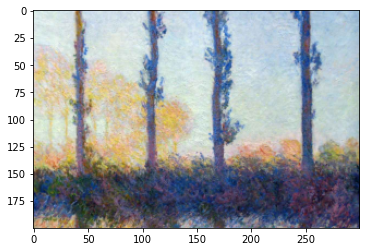

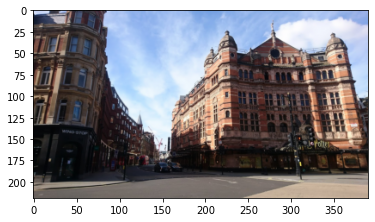

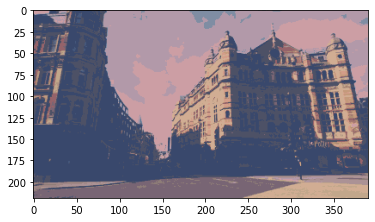

In [18]:
plt.imshow(image_list[closest_sample])
plt.show()
plt.imshow(resized_target)
plt.show()
plt.imshow(target_transformed)
plt.show()